<a href="https://colab.research.google.com/github/alfawzaan/deep-learning-projects/blob/master/Final_Segmentation_Script.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

def viewImage(image):
  # cv2.namedWindow('Display', cv2.WINDOW_NORMAL)
  # cv2.imshow(image)
  cv2_imshow(image)
  cv2.waitKey(0)
  cv2.destroyAllWindows()

# !gdown --id 1XkG4aYIjSPlBMv0NxIyGD22VDVeh-pnn
# !wget https://drive.google.com/uc?export=download&confirm=0hEb&id=1XkG4aYIjSPlBMv0NxIyGD22VDVeh-pnn

In [0]:
!git clone https://github.com/spMohanty/PlantVillage-Dataset

Cloning into 'PlantVillage-Dataset'...
remote: Enumerating objects: 163229, done.
remote: Total 163229 (delta 0), reused 0 (delta 0), pack-reused 163229
Receiving objects: 100% (163229/163229), 2.00 GiB | 28.91 MiB/s, done.
Resolving deltas: 100% (99/99), done.
Checking out files: 100% (182401/182401), done.


In [0]:
def annotate_leaves_contour(img, low_hsv, upper_hsv, threshold, border_color= (0,0,255), boarder_thickness=2):
  viewImage(img)
  image_copy = img
  #=============CONVERT IMAGE BACKGROUND TO HSV FOR EASY FEATURE EXTRACTION================#
  hsv_img = cv2.cvtColor(image_copy, cv2.COLOR_BGR2HSV)
  # viewImage(hsv_img)//Debugging

  #=============EXTRACT COLOUR FROM IMAGE================#
  hsv_all_img_green = cv2.inRange(hsv_img, low_hsv, upper_hsv)
 
  #=============CREATE A MASK ON THE IMAGE================#
  masked_img = cv2.bitwise_and(hsv_img, hsv_img, mask = hsv_all_img_green )
  viewImage(masked_img)#Debugging

  #=============CONVERT IMAGE TO GRAY================#
  hsv_to_bgr = cv2.cvtColor(masked_img, cv2.COLOR_HSV2RGB)
  # viewImage(hsv_to_bgr)//Debugging
  bgr_to_grey = cv2.cvtColor(masked_img, cv2.COLOR_RGB2GRAY)
  # viewImage(bgr_to_grey)//Debugging
  #=============CONVERT IMAGE TO GRAY================#

  #=============MASK THE GREEN PART WITH WHITE, OTHERS WITH BLACK================#
  rest, thresh = cv2.threshold(bgr_to_grey, threshold, 255, 0)
  viewImage(thresh)
  print("Displaying Threshold")


  #=============GENERATE THE CONTOURS================#
  contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE) 
  #=============DRAW THE CONTOURS================#
  cv2.drawContours(image_copy, contours, -1, border_color, boarder_thickness)
  # viewImage(img)
  viewImage(image_copy)
  

  return image_copy, contours


In [0]:
t_healthy_path = ["/content/PlantVillage-Dataset/raw/color/Tomato___healthy/000146ff-92a4-4db6-90ad-8fce2ae4fddd___GH_HL Leaf 259.1.JPG", "/content/PlantVillage-Dataset/raw/color/Tomato___healthy/02d94768-da6d-4c1a-b8b3-fa2e5a2fcd4d___RS_HL 0449.JPG",
        "/content/PlantVillage-Dataset/raw/color/Tomato___healthy/0764ce38-ecb9-4046-88d9-c8f176c6ee8b___GH_HL Leaf 423.JPG", "/content/PlantVillage-Dataset/raw/color/Tomato___healthy/0b5cfce2-38fd-4984-8926-2d2911c48490___RS_HL 9733.JPG",
        "/content/PlantVillage-Dataset/raw/color/Tomato___healthy/12c28bfa-a576-4787-8d4e-a500ac446766___RS_HL 0526.JPG"]

t_bacterial_spot_paths = ["/content/PlantVillage-Dataset/raw/color/Tomato___Late_blight/0003faa8-4b27-4c65-bf42-6d9e352ca1a5___RS_Late.B 4946.JPG",
                    "/content/PlantVillage-Dataset/raw/color/Tomato___Late_blight/01c391d2-1b3a-4b58-b205-a75674bba6e9___GHLB2 Leaf 8824.JPG",
                    "/content/PlantVillage-Dataset/raw/color/Tomato___Late_blight/151c010a-021f-459d-a456-63ebaf19b2d5___GHLB2 Leaf 9104.JPG",
                    "/content/PlantVillage-Dataset/raw/color/Tomato___Late_blight/41e1ea20-a4d0-4ef0-9362-b3756c8c06ec___GHLB2 Leaf 8755.JPG"]

t_healthy_images = []
for i in range(len(t_healthy_path)):
  t_healthy_images.append(cv2.imread(t_healthy_path[i]))

t_bacterial_spot_images = []
for i in range(len(t_bacterial_spot_paths)):
  t_bacterial_spot_images.append(cv2.imread(t_bacterial_spot_paths[i]))

green = np.uint8([[[140,140,140]]])
green_hsv = cv2.cvtColor(green, cv2.COLOR_BGR2HSV)
print(green_hsv)
viewImage(green_hsv)
green = np.uint8([[[200,200,200]]])
green_hsv = cv2.cvtColor(green, cv2.COLOR_BGR2HSV)
print(green_hsv)
viewImage(green_hsv)

  # viewImage(t_bacterial_spot_images[i])

[[[  0   0 140]]]


[[[  0   0 200]]]


for i in range(len(t_healthy_images)):
  green_low = np.array([15, 0, 0])
  green_high = np.array([70,255, 255])
  threshold = 15
  boarder_colour = (0,0,255)
  boarder_thickness = 2
  annotate_leaves_contour(images[i], green_low, green_high, threshold, boarder_colour, boarder_thickness)


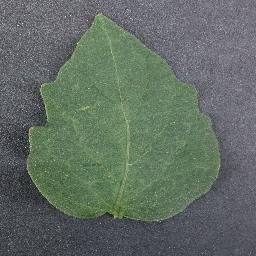

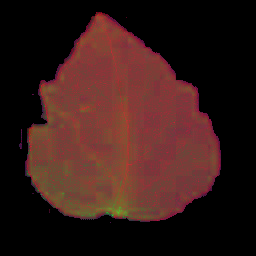

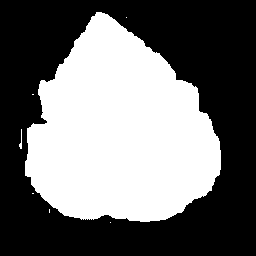

Displaying Threshold


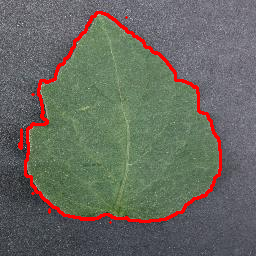

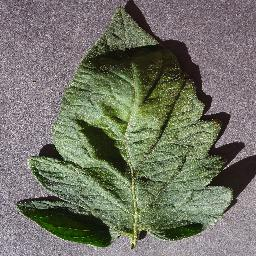

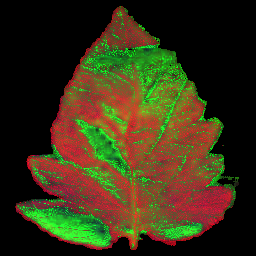

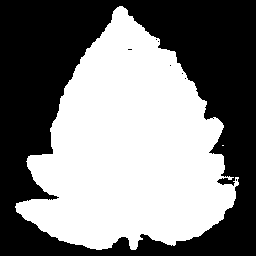

Displaying Threshold


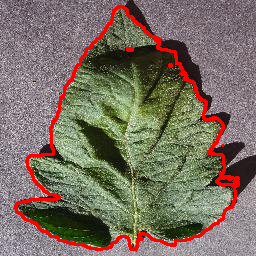

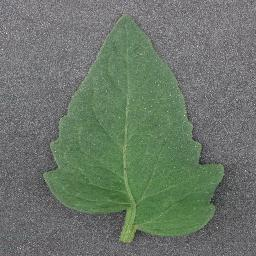

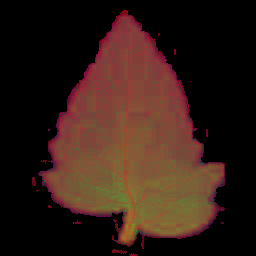

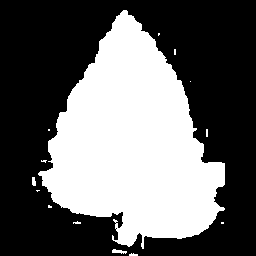

Displaying Threshold


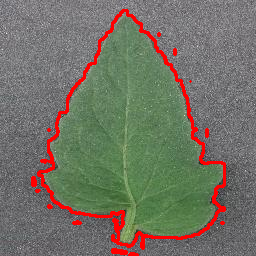

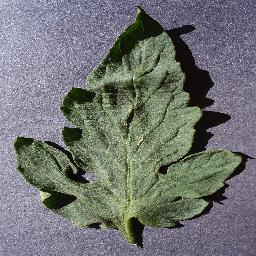

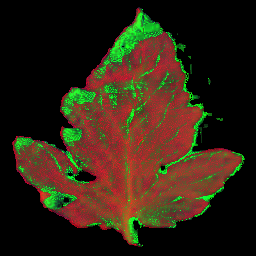

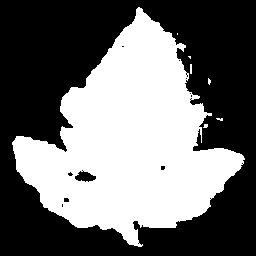

Displaying Threshold


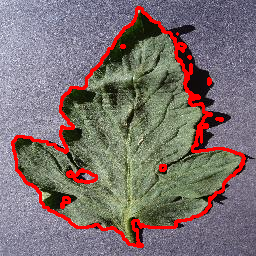

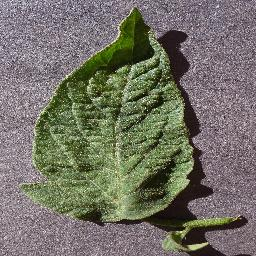

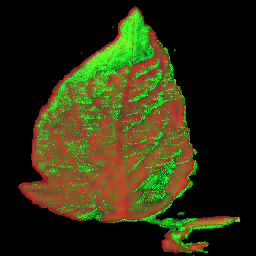

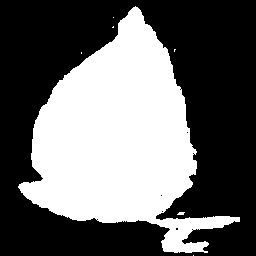

Displaying Threshold


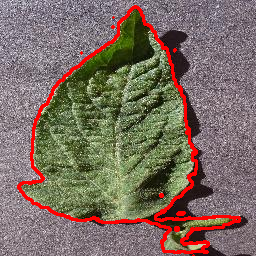

In [0]:
#===================FOR LEAVE DETECTION (OPTIMIZATION NEEDED)===========#

for i in range(len(t_healthy_images)):
  green_low = np.array([15, 0, 0])
  green_high = np.array([70,255, 255])
  threshold = 12
  boarder_colour = (0,0,255)
  boarder_thickness = 2
  annotate_leaves_contour(t_healthy_images[i], green_low, green_high, threshold, boarder_colour, boarder_thickness)

In [0]:
#===================FOR DISEASED SPOT ANNOTATION (STILL IN DEV STAGE)===========#
#===================NEED SPOT COLOUR RANGE VALUE===========#

# for i in range(len(t_bacterial_spot_images)):
#   green_low = np.array([140, 0, 0])
#   green_high = np.array([200,255, 255])
#   threshold = 140
#   boarder_colour = (0,0,255)
#   boarder_thickness = 2
#   annotate_leaves_contour(t_bacterial_spot_images[i], green_low, green_high, threshold, boarder_colour, boarder_thickness)